# 1000 чертей

In [100]:
from scipy.interpolate import splrep, splev
import statsmodels
import pc
import statsmodels.api as sm
import statsmodels.stats.api as ssa
import scipy
import numpy as np
import random
import sklearn
import seaborn as sns
import scipy.stats as sps
import matplotlib.pyplot as plt
import math
from scipy.stats import bws_test
from sklearn import linear_model 
import csv
from sklearn.linear_model import LinearRegression, HuberRegressor, RANSACRegressor
from sklearn.metrics import mean_squared_error
from statsmodels.regression.quantile_regression import QuantReg
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering, OPTICS, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd
from scipy.linalg import eigh as sp_eigh
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import CCA
from scipy.stats import normaltest
from scipy.stats import shapiro
from scipy.interpolate import splrep, splev
import statsmodels
import pc
from statsmodels.nonparametric.kernel_regression import KernelReg
from sklearn.linear_model import LinearRegression
import scipy
import random
import sklearn
import math
from scipy.stats import bws_test
from sklearn import linear_model 
import csv
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from scipy.stats import f
from statsmodels.stats.outliers_influence import summary_table
from sklearn.linear_model import LinearRegression
import scipy
import random
import sklearn
from scipy.stats import anderson
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss, brier_score_loss
from sklearn.ensemble import RandomForestRegressor
import math
from scipy.stats import bws_test
from sklearn import linear_model 
import csv
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import statistics
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, r2_score
from sklearn.metrics import accuracy_score

# Normal DATA

In [75]:



from sklearn.preprocessing import RobustScaler, PowerTransformer

data = pd.read_csv('Answers1.csv')
Age = data['Age'].tolist()
Sex = data['Sex'].tolist()
Course = data['Course'].tolist()
Attitude_to_study = data['Attitude_to_study'].tolist()
Hobby = data['Hobby'].tolist()
Screen_Time_WD = data['Screen_Time(WD)'].tolist()
Screen_Time_We = data['Screen_Time(We)'].tolist()
Working = data['Working'].tolist()
Addiction = data['Addiction'].tolist()
Doing_sports = data['Doing_sports'].tolist()
Sporty_man = data['Sporty_man'].tolist()
Prefer_gadget = data['Prefer_gadget'].tolist()
#Prefer_App_category = data['Prefer_App_category'].tolist()
Notification_annoy = data['Notification_annoy'].tolist()
Dont_disturb_mode = data['Dont_disturb_mode'].tolist()
Notes_in_copybook = data['Notes_in_copybook'].tolist()
Notes_in_laptop = data['Notes_in_laptop'].tolist()
Free_time = data['Free_time'].tolist()
Sociability = data['Sociability'].tolist()
Science_content = data['Science_content'].tolist()
Entertainment_content = data['Entertainment_content'].tolist()
Average_mark = data['Average_mark'].tolist()
Educational_institution = data['Educational_institution'].tolist()
Charger_carrying = data['Charger_carrying'].tolist()
Notifications_delay = data['Notifications_delay'].tolist()

#print(Age, "\n \n", Course, "\n \n", Attitude_to_study, " \n \n", Screen_Time_WD, "\n \n")

def test_normality(df, column_name):
    data1 = df[column_name]
    stats, p_value = shapiro(data1)
    flag = 0
    print(f"Тест на нормальность для столбца '{column_name}' shapiro_test  stats = '{stats}'; p-value = '{p_value}':")
    if p_value > 0.05:
        print("Данные распределены нормально (не отвергаем нулевую гипотезу)\n")
        flag +=1
    else:
        print("Данные не распределены нормально (отвергаем нулевую гипотезу)\n")
    stat, p_value = normaltest(data1)
    print(f"Тест на нормальность для столбца '{column_name}' D'Agosino  stats = '{stats}'; p-value = '{p_value}':")
    # Интерпретация результатов
    if p_value > 0.05:
        print("Данные распределены нормально (не отвергаем нулевую гипотезу)\n")
        flag+=1
    else:
        print("Данные не распределены нормально (отвергаем нулевую гипотезу)\n")
    result = anderson(data1)
    critical_values = result.critical_values
    print(f"Тест на нормальность для столбца '{column_name}' Anderson  '{critical_values}':")
    if result.statistic < critical_values[2] and result.significance_level < 0.05:
        print("Данные распределены нормально\n")
        flag += 1
    else:
        print("Данные не распределены нормально\n")

    if flag != 2:
        print(f"\n %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% \n ДАННЫЕ '{column_name}' Нужно улучшить \n %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% \n")
    else:
        print(f"\n %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% \n ДАННЫЕ '{column_name}' Нормальны \n %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% \n")

df = pd.DataFrame(data)
dfBC = pd.DataFrame(data)


# Выбор столбцов для нормализации
columns_to_normalize = dfBC.columns.difference(['Sex', 'Working', 'Educational_institution'])



dfBC[columns_to_normalize] += 1
# Нормализация данных в выбранных столбцах с использованием метода Box-Cox
for column in columns_to_normalize:
        dfBC[column], lambda_col = sps.boxcox(dfBC[column])
# scaler = RobustScaler()
# dfBC[columns_to_normalize] = scaler.fit_transform(dfBC[columns_to_normalize])
scaler = PowerTransformer(method='yeo-johnson')
dfBC[columns_to_normalize] = scaler.fit_transform(dfBC[columns_to_normalize])

print(df['Age'], '\n', dfBC['Age'])

for column in columns_to_normalize:
    print('\n %%%%%%%%%%%%%%%%%%%%%%%%%%%%% Before StScaler  %%%%%%%%%%%%%%%%%%%%%%%%%%%%% \n')
    test_normality(df, column)
    print('\n %%%%%%%%%%%%%%%%%%%%%%%%%%%%% AFTER StScaler  %%%%%%%%%%%%%%%%%%%%%%%%%%%%% \n')
    test_normality(dfBC, column)



# test_normality(dfBC, 'Age')
# test_normality(dfBC, 'Course')
# test_normality(dfBC, 'Hobby')
# test_normality(dfBC, 'Screen_Time(WD)')
# test_normality(dfBC, 'Screen_Time(We)')
# test_normality(dfBC, 'Addiction')
# test_normality(dfBC, 'Doing_sports')
# test_normality(dfBC, 'Sporty_man')
# test_normality(dfBC, 'Prefer_gadget')
# test_normality(dfBC, 'Notification_annoy')
# test_normality(dfBC, 'Dont_disturb_mode')
# test_normality(dfBC, 'Notes_in_copybook')
# test_normality(dfBC, 'Notes_in_laptop')
# test_normality(dfBC, 'Free_time')
# test_normality(dfBC, 'Sociability')
# test_normality(dfBC, 'Science_content')
# test_normality(dfBC, 'Entertainment_content')
# test_normality(dfBC, 'Average_mark')
# test_normality(dfBC, 'Charger_carrying')
# test_normality(dfBC, 'Notifications_delay')


0     17
1     17
2     18
3     18
4     18
      ..
91    24
92    24
93    24
94    24
95    24
Name: Age, Length: 96, dtype: int64 
 0    -2.320593
1    -2.320593
2    -1.424679
3    -1.424679
4    -1.424679
        ...   
91    1.969927
92    1.969927
93    1.969927
94    1.969927
95    1.969927
Name: Age, Length: 96, dtype: float64

 %%%%%%%%%%%%%%%%%%%%%%%%%%%%% Before StScaler  %%%%%%%%%%%%%%%%%%%%%%%%%%%%% 

Тест на нормальность для столбца 'Addiction' shapiro_test  stats = '0.9150650648586068'; p-value = '1.1388839139746296e-05':
Данные не распределены нормально (отвергаем нулевую гипотезу)

Тест на нормальность для столбца 'Addiction' D'Agosino  stats = '0.9150650648586068'; p-value = '0.0031057060487803922':
Данные не распределены нормально (отвергаем нулевую гипотезу)

Тест на нормальность для столбца 'Addiction' Anderson  '[0.554 0.631 0.757 0.884 1.051]':
Данные не распределены нормально


 %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% 
 ДАННЫЕ 'Addiction' Нужно улучшить 
 %%%%%%

# Тепловая Карта

0     17
1     17
2     18
3     18
4     18
      ..
91    24
92    24
93    24
94    24
95    24
Name: Age, Length: 96, dtype: int64 
 0    -1.893787
1    -1.893787
2    -1.293775
3    -1.293775
4    -1.293775
        ...   
91    2.306295
92    2.306295
93    2.306295
94    2.306295
95    2.306295
Name: Age, Length: 96, dtype: float64

 %%%%%%%%%%%%%%%%%%%%%%%%%%%%% Before StScaler  %%%%%%%%%%%%%%%%%%%%%%%%%%%%% 

Тест на нормальность для столбца 'Addiction' shapiro_test  stats = '0.9150650648586068'; p-value = '1.1388839139746296e-05':
Данные не распределены нормально (отвергаем нулевую гипотезу)

Тест на нормальность для столбца 'Addiction' D'Agosino  stats = '0.9150650648586068'; p-value = '0.0031057060487803922':
Данные не распределены нормально (отвергаем нулевую гипотезу)


 %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% 
 ДАННЫЕ 'Addiction' Нужно улучшить 
 %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% 


 %%%%%%%%%%%%%%%%%%%%%%%%%%%%% AFTER StScaler  %%%%%%%%%%%%%%%%%%%%%%%%%%%%% 

Тест на нор

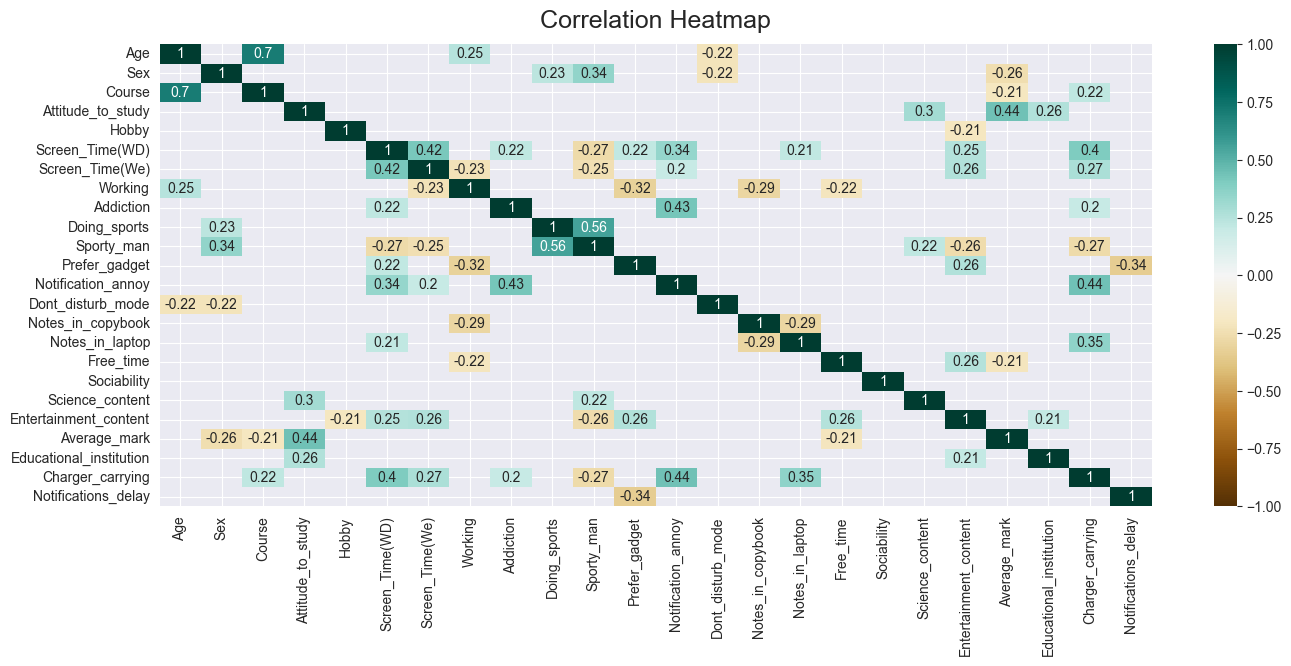

....
 
....


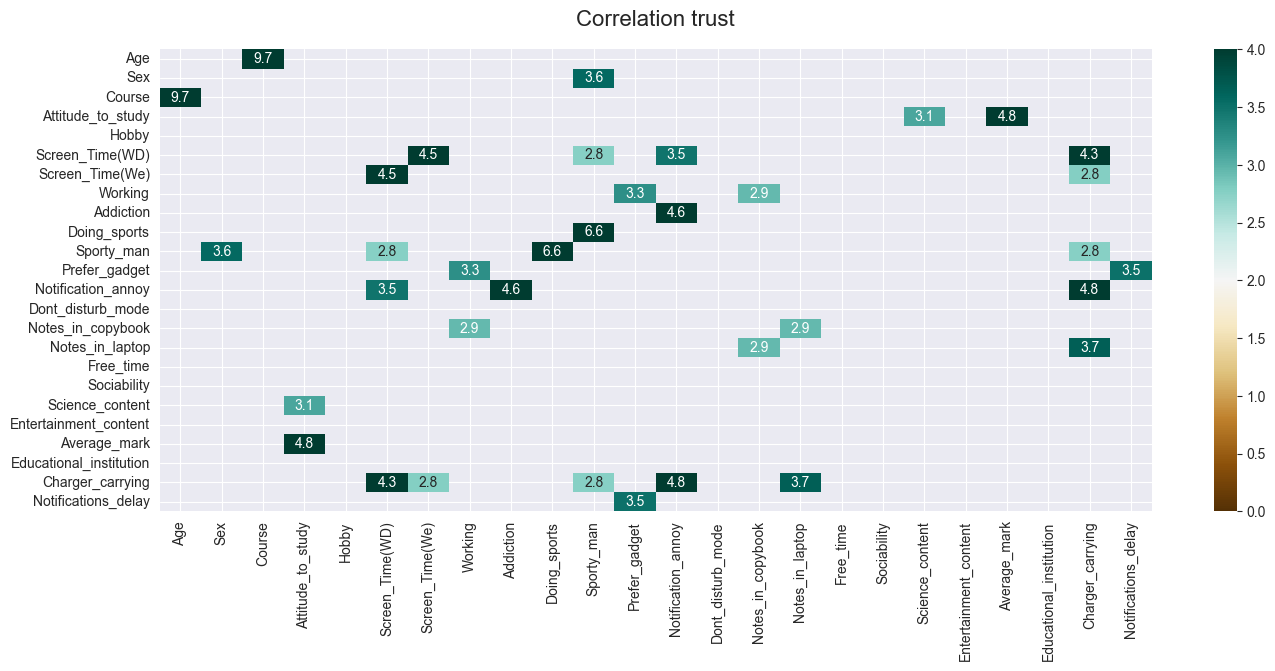

Пирсон Addiction, Notification_annoy : 
 PearsonRResult(statistic=0.4268807377622308, pvalue=1.4430099756297888e-05) 


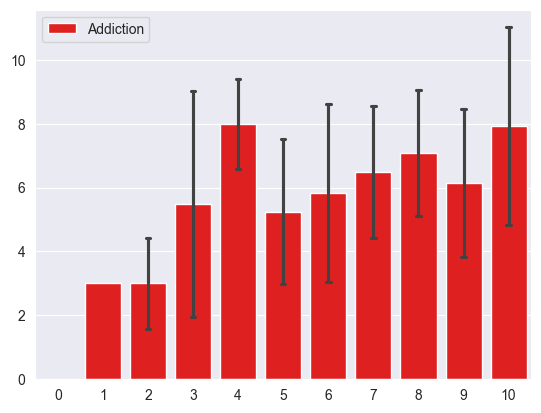

Average_mark, Attitude_to_study 
 PearsonRResult(statistic=0.4448055737466723, pvalue=5.61388861384405e-06) 


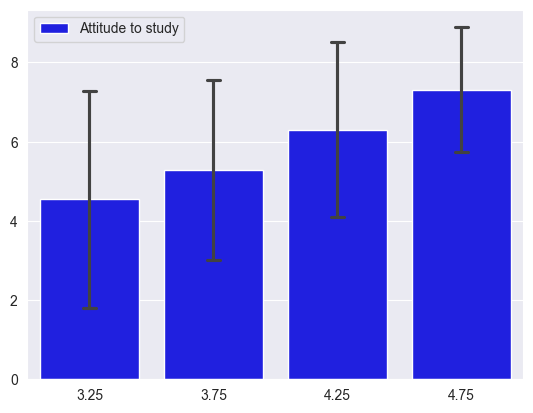

Charger_carrying, Notification_annoy 
 PearsonRResult(statistic=0.4405966258529597, pvalue=7.04100508666582e-06) 


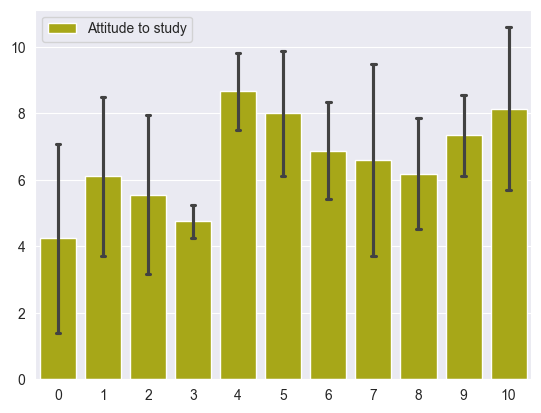

Prefer_gadget, Screen_Time_We 
 PearsonRResult(statistic=0.08960475265281169, pvalue=0.3852896432669245) 


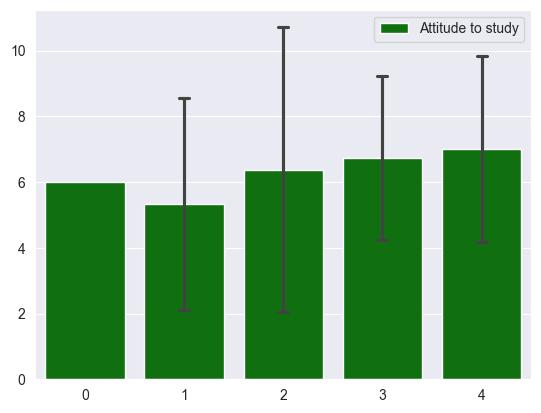

Sporty_man, Sex 
 PearsonRResult(statistic=0.3440333428443549, pvalue=0.0005990106202206335) 


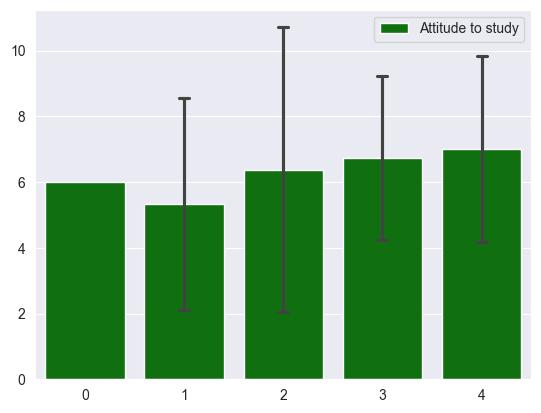

Prefer_gadget, Screen_Time_We 
 PearsonRResult(statistic=0.08960475265281169, pvalue=0.3852896432669245) 


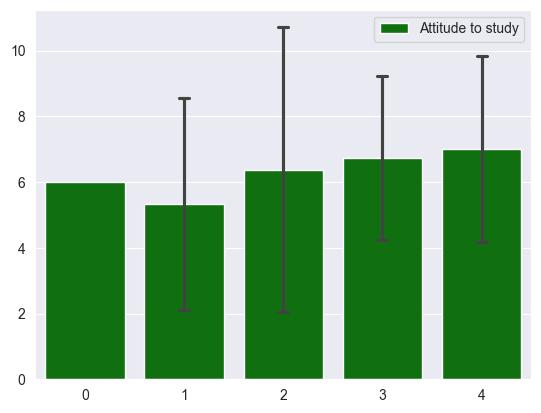

In [65]:


_= plt.figure(figsize=(16, 6))
mask = np.array(abs(df.corr(method='pearson')) < 0.2)

heatmap = sns.heatmap(df.corr(method='pearson'),mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12); 

# Сохраните карту как png файл 
# Параметр dpi устанавливает разрешение сохраняемого изображения в точках на дюйм 
# bbox_inches, когда установлен в значение 'tight', не позволяет обрезать лейблы

plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')
plt.show()



print("....\n \n....")
_= plt.figure(figsize=(16, 6))
T = abs(df.corr(method='pearson')/(((1-df.corr(method='pearson')**2)/(97-2))**(1/2)))
mask = np.array(T < 2.7)

#print(mask)
heatmap1 = sns.heatmap(T , mask=mask, vmin=0, vmax=4, annot = True, cmap='BrBG')
heatmap1.set_title('Correlation trust', fontdict={'fontsize':16}, pad=17); 
plt.savefig('heatmap1.png', dpi=400, bbox_inches='tight')
plt.show()

test1 = scipy.stats.pearsonr(Addiction, Notification_annoy)
test2 = scipy.stats.pearsonr(Average_mark, Attitude_to_study)
test3 = scipy.stats.pearsonr(Charger_carrying, Notification_annoy)
test4 = scipy.stats.pearsonr(Prefer_gadget, Screen_Time_We)
test5 = scipy.stats.pearsonr(Sporty_man, Sex)
test6 = scipy.stats.pearsonr(Science_content, Attitude_to_study)
test7 = scipy.stats.pearsonr(Charger_carrying, Sporty_man)


print("Пирсон Addiction, Notification_annoy : \n",test1, "\n")

_= sns.barplot(data=data, 
               x=Addiction, 
               y=Notification_annoy, errorbar='sd',color = 'r', 
               capsize=0.1, label="Addiction")
# _ = plt.legend("Notification annoy", "Addiction")
plt.show()
print("Average_mark, Attitude_to_study \n",test2, "\n")



_= sns.barplot(data=data, 
               x=Average_mark, 
               y=Attitude_to_study, errorbar='sd',color = 'b', 
               capsize=0.1, label="Attitude to study")
plt.show()
print("Charger_carrying, Notification_annoy \n",test3, "\n")

_= sns.barplot(data=data, 
               x=Charger_carrying, 
               y=Notification_annoy, errorbar='sd',color = 'y', 
               capsize=0.1, label="Attitude to study")
plt.show()

print("Prefer_gadget, Screen_Time_We \n",test4, "\n")

_= sns.barplot(data=data, 
               x=Prefer_gadget, 
               y=Screen_Time_We, errorbar='sd',color = 'g', 
               capsize=0.1, label="Attitude to study")
plt.show()

print("Sporty_man, Sex \n",test5, "\n")

_= sns.barplot(data=data, 
               x=Prefer_gadget, 
               y=Screen_Time_We, errorbar='sd',color = 'g', 
               capsize=0.1, label="Attitude to study")
plt.show()

print("Prefer_gadget, Screen_Time_We \n",test4, "\n")

_= sns.barplot(data=data, 
               x=Prefer_gadget, 
               y=Screen_Time_We, errorbar='sd',color = 'g', 
               capsize=0.1, label="Attitude to study")
plt.show()

# _= sns.barplot(data=Screen_Time_We, errorbar='sd',color = 'g', 
#                capsize=0.1, label="Screen Time We")
# plt.show()

# shapiro_test = sps.shapiro(Screen_Time_We, Attitude_to_study)
# print("Screen_Time_We, Attitude_to_study \n:", shapiro_test)

# anderson_test = sps.anderson(Screen_Time_We, Attitude_to_study)
# print("Screen_Time_We, Attitude_to_study : \n", anderson_test) 
# 
# dagostino_test = sps.normaltest(Screen_Time_We, Attitude_to_study)
# print("Screen_Time_We, Attitude_to_study :\n",dagostino_test)
# 
# ks_test = sps.kstest(Screen_Time_We, Attitude_to_study)
# print("Screen_Time_We, Attitude_to_study :\n",ks_test)



# Part №2

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                    0.6369
Date:                Fri, 26 Apr 2024   Prob (F-statistic):              0.637
Time:                        09:06:08   Log-Likelihood:                -39.417
No. Observations:                  96   AIC:                             88.83
Df Residuals:                      91   BIC:                             101.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9757      0.081     24.379      0.0

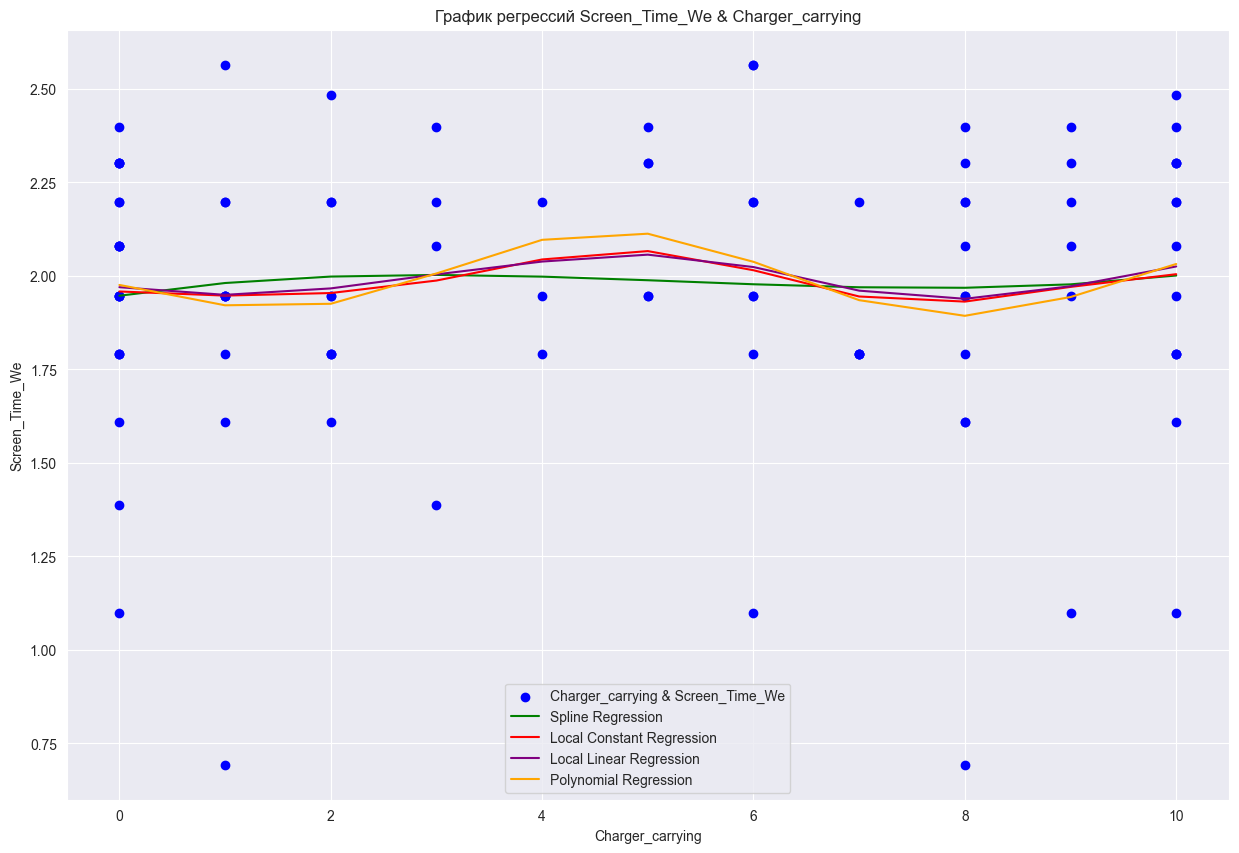

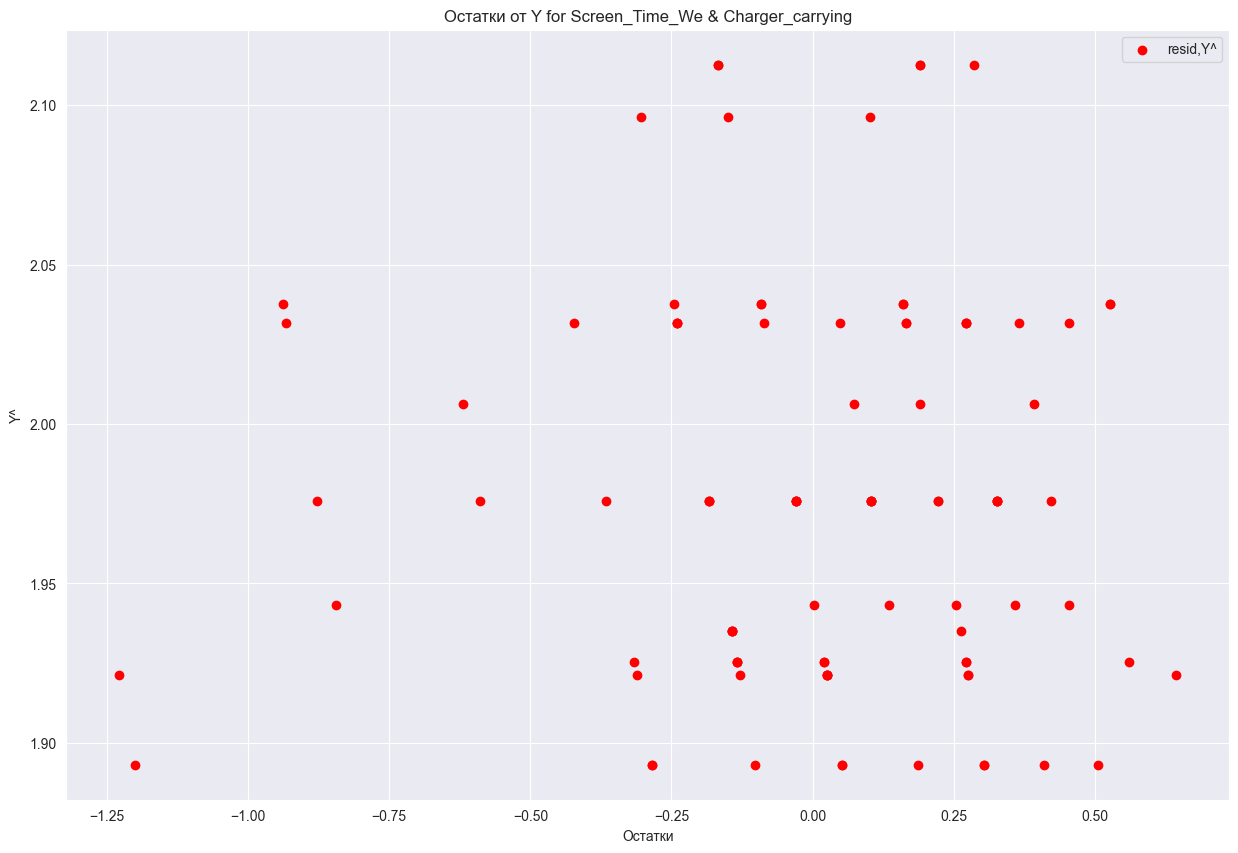

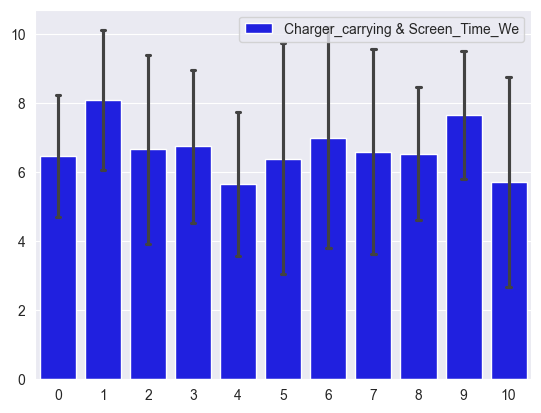

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.042
Method:                 Least Squares   F-statistic:                   0.05091
Date:                Fri, 26 Apr 2024   Prob (F-statistic):              0.995
Time:                        09:06:11   Log-Likelihood:                -40.635
No. Observations:                  96   AIC:                             91.27
Df Residuals:                      91   BIC:                             104.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9630      0.082     23.916      0.0

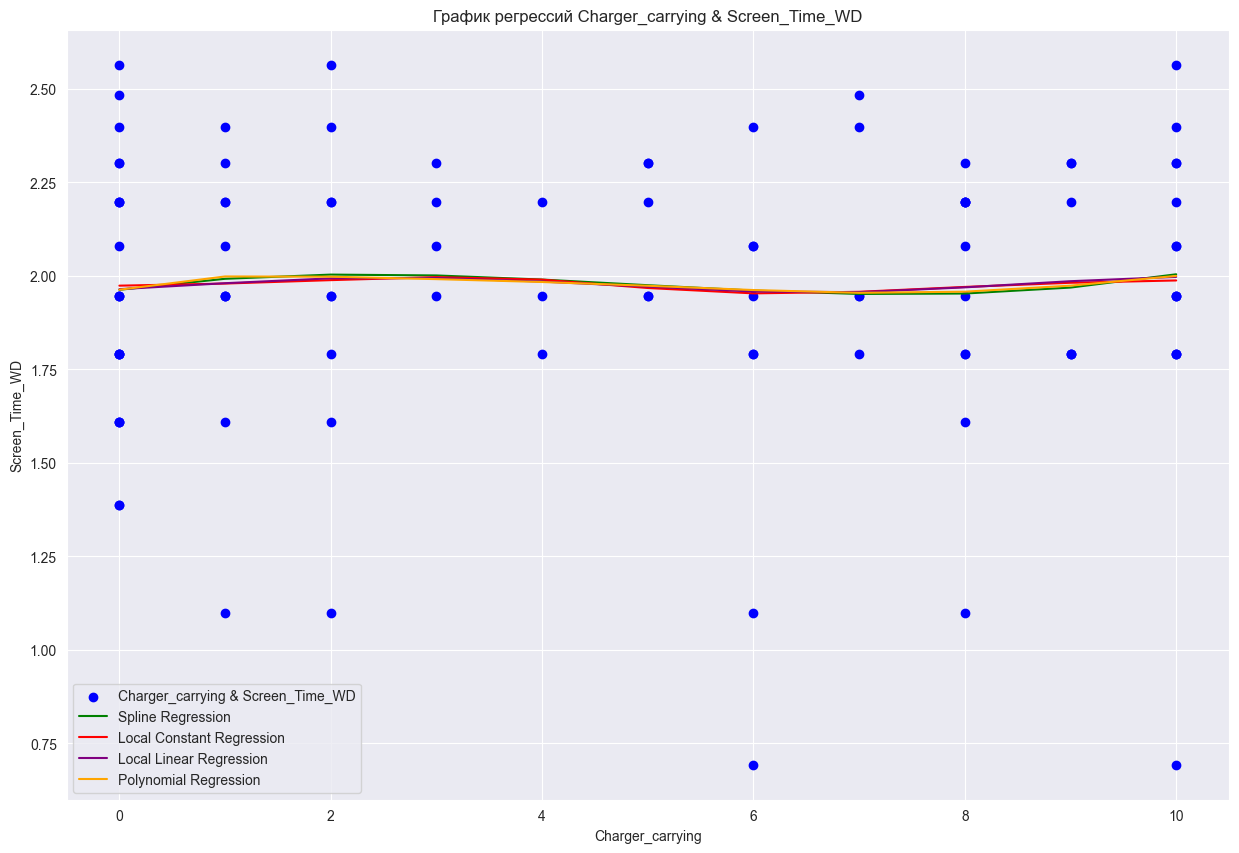

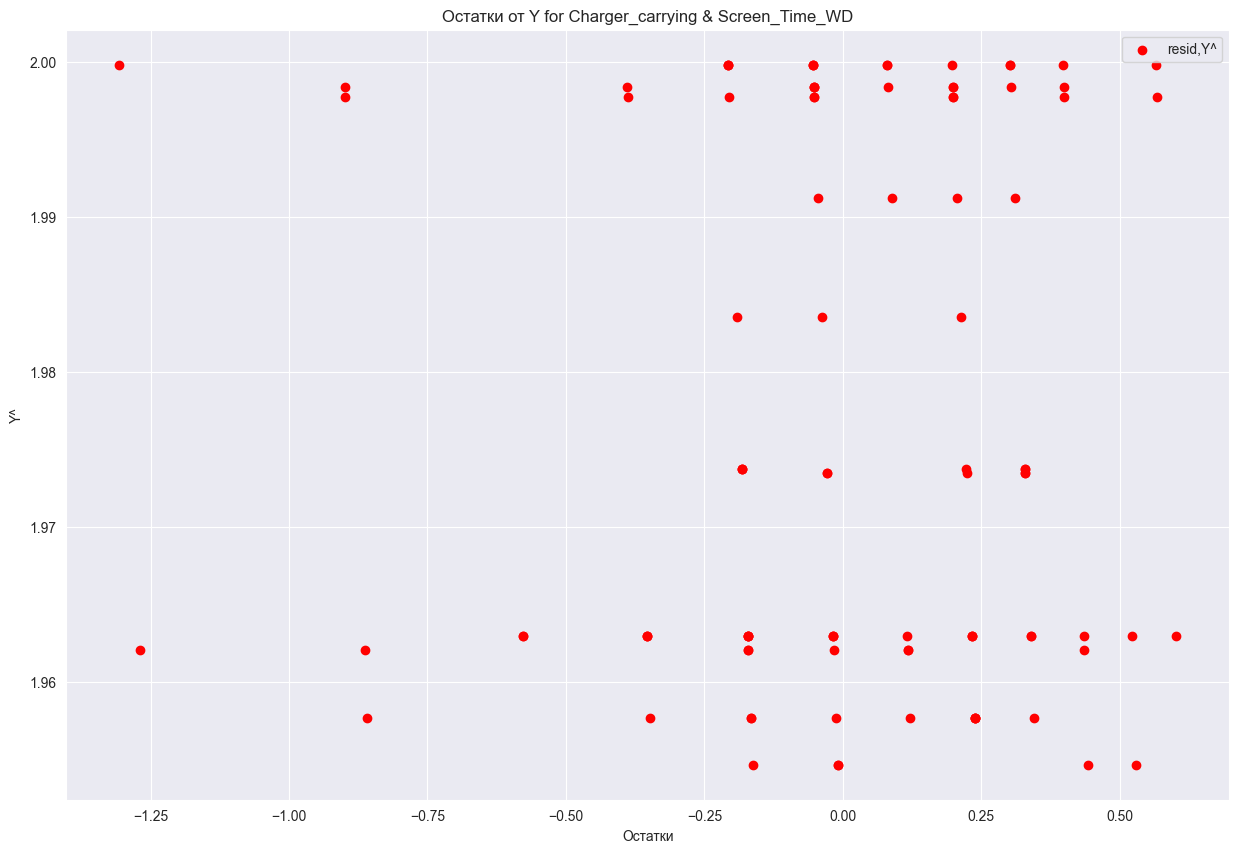

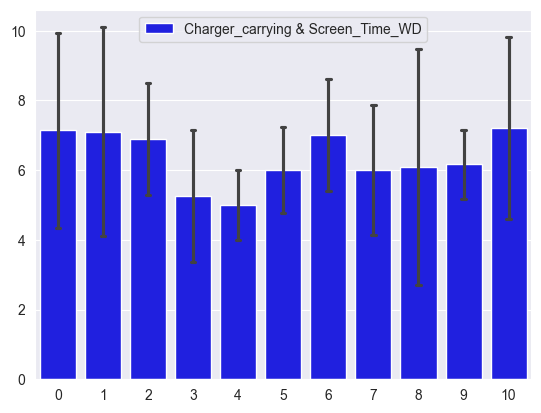

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                    0.5822
Date:                Fri, 26 Apr 2024   Prob (F-statistic):              0.676
Time:                        09:06:14   Log-Likelihood:                -39.530
No. Observations:                  96   AIC:                             89.06
Df Residuals:                      91   BIC:                             101.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0384      0.081     25.123      0.0

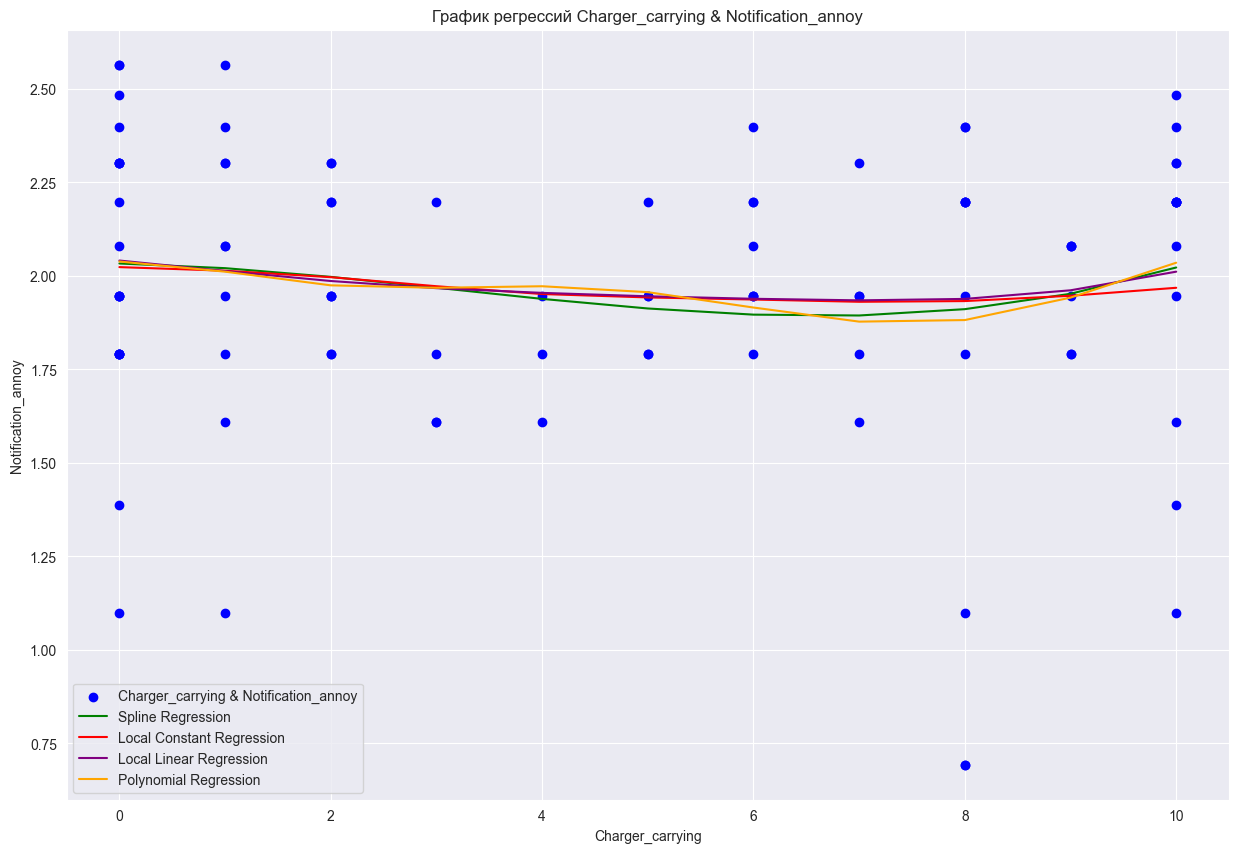

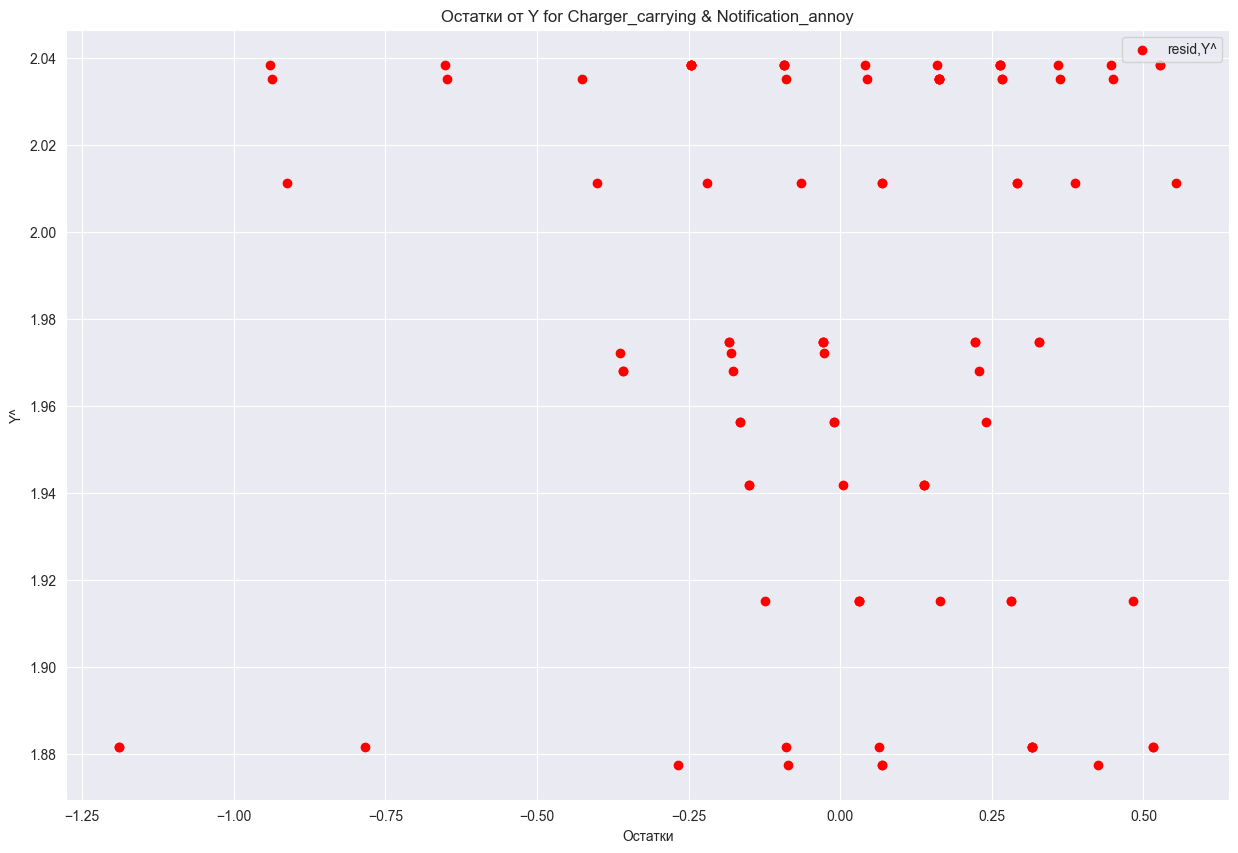

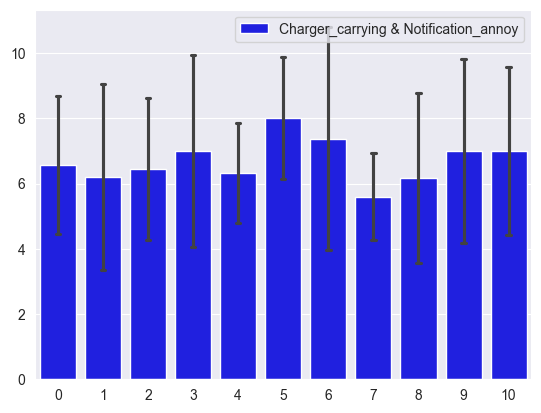

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     1.270
Date:                Fri, 26 Apr 2024   Prob (F-statistic):              0.288
Time:                        09:06:17   Log-Likelihood:                -38.135
No. Observations:                  96   AIC:                             86.27
Df Residuals:                      91   BIC:                             99.09
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -572.7405    294.252     -1.946      0.0

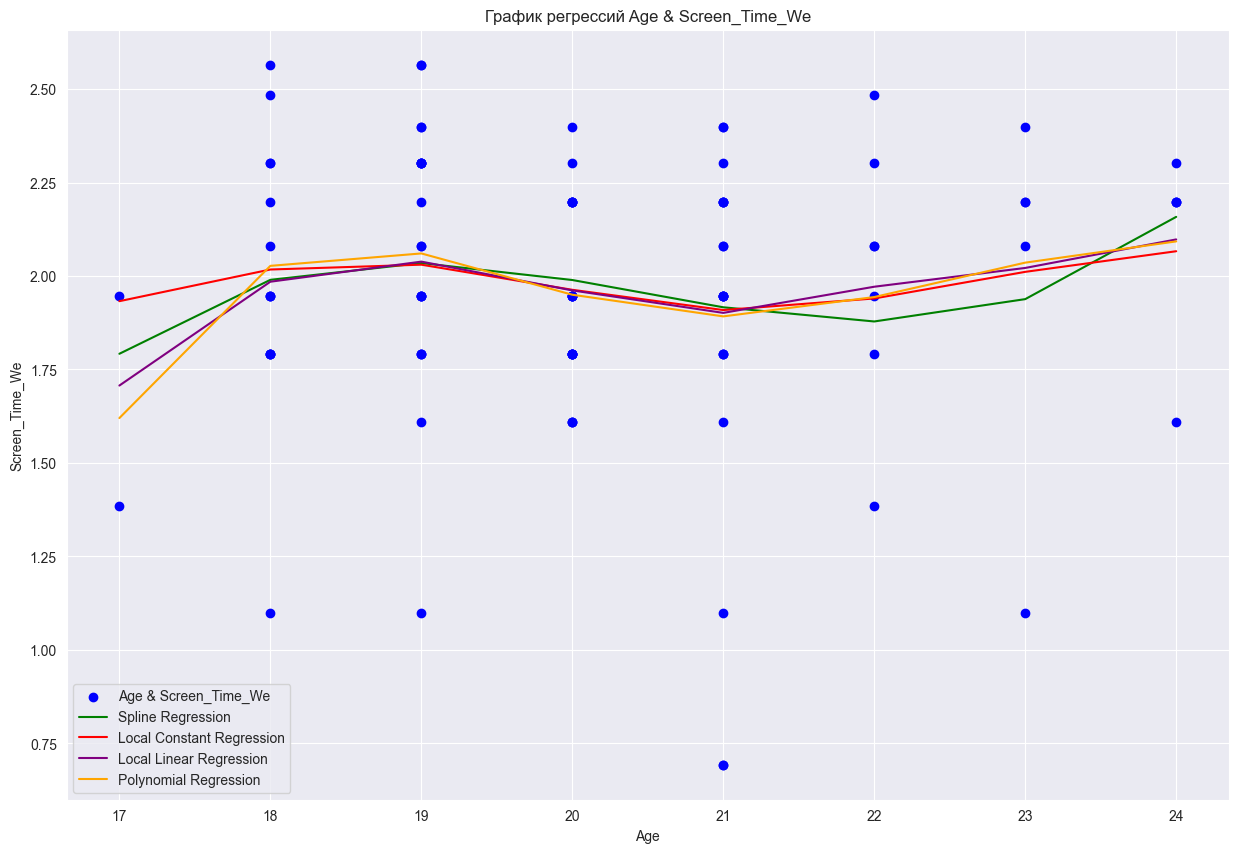

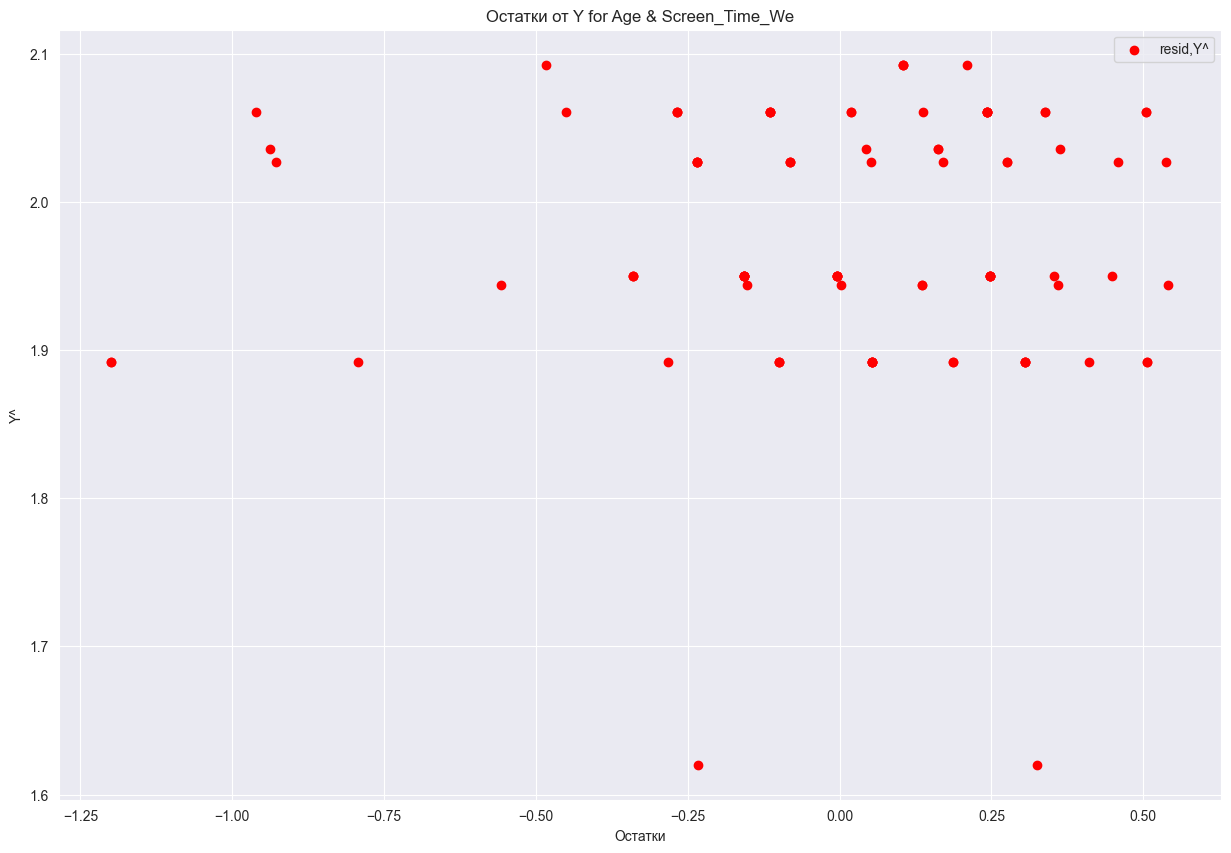

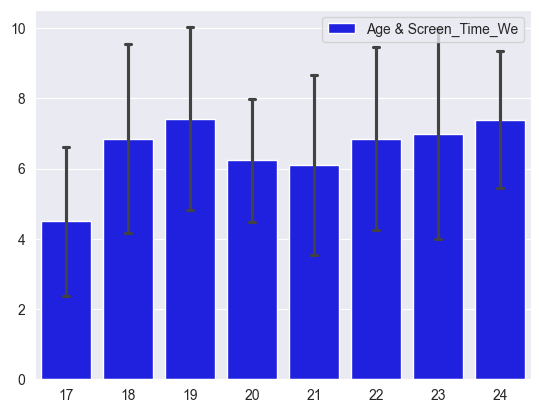

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.7427
Date:                Fri, 26 Apr 2024   Prob (F-statistic):              0.565
Time:                        09:06:20   Log-Likelihood:                -39.200
No. Observations:                  96   AIC:                             88.40
Df Residuals:                      91   BIC:                             101.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.9227    297.536      0.107      0.9

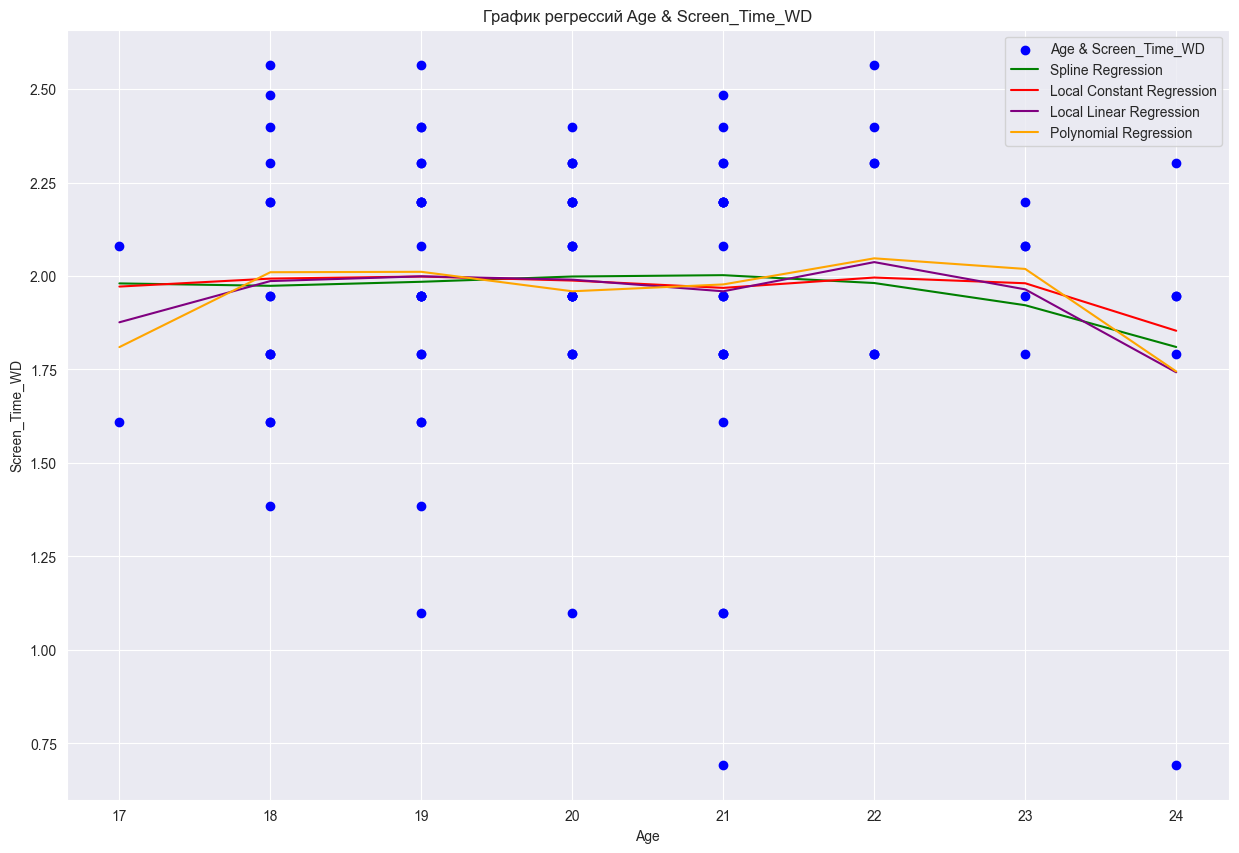

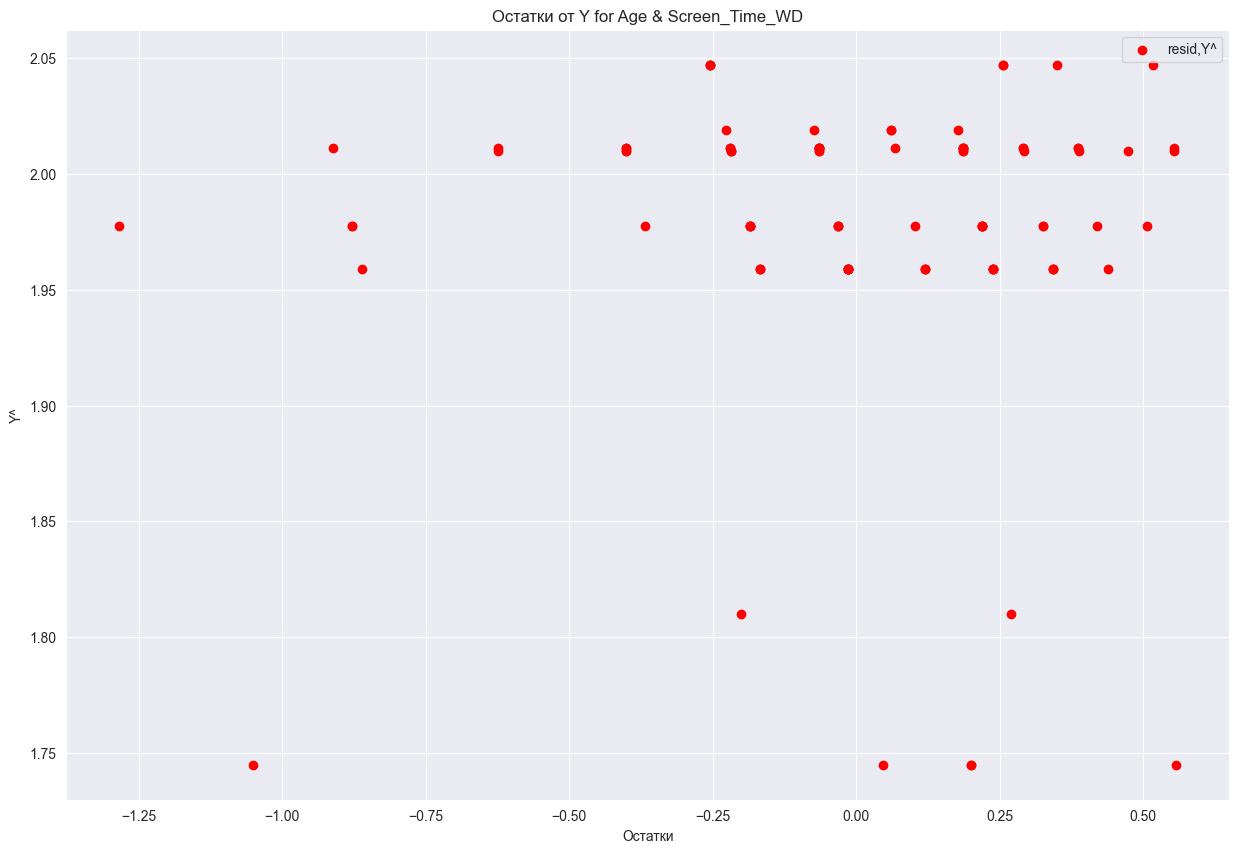

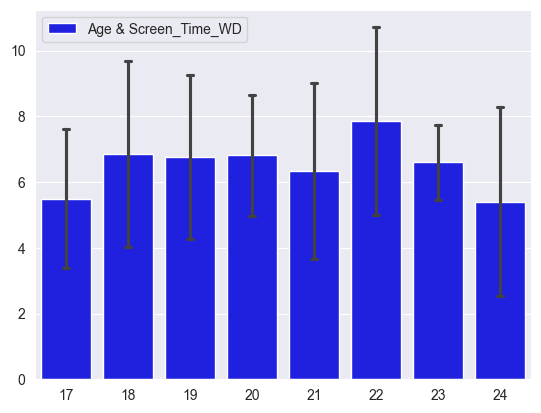

In [52]:



def f1(x, y, y_pred):
    rss = np.sum((y - y_pred)**2)
    
    tss = np.sum((y - np.mean(y))**2)
    r_squared = 1 - (rss / tss)
    
    n = len(x)
    df_num = 1
    df_denom = n - df_num - 1
    
    f_statistic = ((tss - rss) / df_num) / (rss / df_denom)
    f_p_value = f.sf(f_statistic, df_num, df_denom)
    
    print("RSS:", rss)
    print("R-squared:", r_squared)
    print("F-statistic:", f_statistic)
    print("F p-value:", f_p_value)

# Локально постоянная и линейная регрессия
def local_constant_regression(X, Y, kernel):
    model = KernelReg(Y, X, var_type='u', reg_type='lc', bw='cv_ml', ukertype=kernel)
    return model

def local_linear_regression(X, Y, kernel):
    model = KernelReg(Y, X, var_type='u', reg_type='ll', bw='cv_ml', ukertype=kernel)
    return model

def spline_regression(X, Y):
    temp = (len(X)-math.sqrt(2*len(X))+len(X)+math.sqrt(2*len(X)))/2
    xs = sorted(zip(X, Y), key=lambda tup: tup[0])
    x_sorted = [x[0] for x in xs]
    y_sorted = [x[1] for x in xs] 
    # x_sorted = X
    # y_sorted = Y
    tck = splrep(x_sorted, y_sorted, s=temp)
    y_smooth = splev(x_sorted, tck, der=0)
    return x_sorted, y_smooth

#-------------------------------------------------------------------------------------------------------------------------
#-----------------------------------'Charger_carrying & Screen_Time_We----------------------------------------------------
#-------------------------------------------------------------------------------------------------------------------------

np.array(Charger_carrying)
X0 = np.ones(len(Screen_Time_We))
X = np.array(Charger_carrying)

xs = sorted(zip(X, Screen_Time_We), key=lambda tup: tup[0])
X = [x[0] for x in xs]
Screen_Time_We = [x[1] for x in xs] 

X = np.array(X)
Y = np.log(np.array(Screen_Time_We) + 1)
X_poly = sm.add_constant(np.column_stack((X0, X, X**2, np.log(X+1), np.sin(X))))

#Линейная регрессия
model1 = sm.OLS(Y, X_poly).fit()

#Сплайн
x_spline, y_spline = spline_regression(X, Y)

# Регрессия по ядрам
kernels = ['aitchison_aitken_reg', 'aitchisonaitken', "gaussian"]
for kernel in kernels:
    results_lc = local_constant_regression(X, Y, kernel)
    results_ll = local_linear_regression(X, Y, kernel)


b = model1.params
Y_plt = b[0] + b[1] * X + b[2]* X**2 + b[3]* np.log(X+1) + b[4] * np.sin(X)
print(model1.summary())

test01 = ssa.het_breuschpagan(model1.resid**2, X_poly)
print("Тест Бройша - Пагана на Гетероскед для Charger_carrying & Screen_Time_We : ",test01)
test02 = ssa.het_white(model1.resid**2, X_poly)
print("Тест на Гетероск White для Charger_carrying & Screen_Time_We : ",test02, "\n")
test03 = ssa.het_goldfeldquandt(model1.resid**2, X_poly)
print("Тест Голфреда-Кванта на Гетероск для Charger_carrying & Screen_Time_We : ",test03, "\n")


print("\n coeff [const, X, X^2, log(X+1), sin(X)] = ",model1.params)
print("\n std_ err [const, X, X^2, log(X+1), sin(X)] = ", model1.bse, "\n")

print("Polynomial Regression: ")
f1(X, Y, Y_plt)

print("\nLocal Constant Regression: ")
f1(X, Y, results_lc.fit(X)[0])

print("\nLocal Linear Regression: ")
f1(X, Y, results_ll.fit(X)[0])

print("\nSpline Regression: ")
f1(x_spline, Y, y_spline) 


plt.figure(figsize=(15, 10))
plt.scatter(X, Y, color='blue', label='Charger_carrying & Screen_Time_We')
plt.plot(x_spline, y_spline, color='green', label='Spline Regression')
plt.plot(X, results_lc.fit(X)[0], color='red', label='Local Constant Regression')
plt.plot(X, results_ll.fit(X)[0], color='purple', label='Local Linear Regression')
plt.plot(X, Y_plt, color='orange', label='Polynomial Regression')
plt.title('График регрессий Screen_Time_We & Charger_carrying')
plt.ylabel('Screen_Time_We')
plt.xlabel('Charger_carrying')
plt.legend()
plt.savefig('График регрессий Screen_Time_We & Charger_carrying.png', dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(15, 10))
plt.scatter(model1.resid, Y_plt, color='r', label='resid,Y^')
plt.title('Остатки от Y for Screen_Time_We & Charger_carrying')
plt.ylabel('Y^')
plt.xlabel('Остатки')
plt.legend()
plt.savefig('График остатков Screen_Time_We & Charger_carrying.png', dpi=300, bbox_inches='tight')
plt.show()

_= sns.barplot(data=data, 
               x=Charger_carrying, 
               y=Screen_Time_We, errorbar='sd',color = 'b', 
               capsize=0.1, label="Charger_carrying & Screen_Time_We")
plt.savefig('Гистограмма Screen_Time_We & Charger_carrying.png', dpi=300, bbox_inches='tight')
plt.show()

#-------------------------------------------------------------------------------------------------------------------------
#-----------------------------------'Charger_carrying & Screen_Time_WD----------------------------------------------------
#-------------------------------------------------------------------------------------------------------------------------

X = np.array(Charger_carrying)

xs = sorted(zip(X, Screen_Time_WD), key=lambda tup: tup[0])
X = [x[0] for x in xs]
Screen_Time_We = [x[1] for x in xs] 

X = np.array(X)
Y = np.log(np.array(Screen_Time_WD) + 1)
X_poly = sm.add_constant(np.column_stack((X0, X, X**2, np.log(X+1), np.sin(X))))

#Линейная регрессия
model1 = sm.OLS(Y, X_poly).fit()

#Сплайн
x_spline, y_spline = spline_regression(X, Y)

# Регрессия по ядрам
kernels = ['aitchison_aitken_reg', 'aitchisonaitken', "gaussian"]
for kernel in kernels:
    results_lc = local_constant_regression(X, Y, kernel)
    results_ll = local_linear_regression(X, Y, kernel)


b = model1.params
Y_plt = b[0] + b[1] * X + b[2]* X**2 + b[3]* np.log(X+1) + b[4] * np.sin(X)
print(model1.summary())

test01 = ssa.het_breuschpagan(model1.resid**2, X_poly)
print("Тест Бройша - Пагана на Гетероскед для Charger_carrying & Screen_Time_WD : ",test01)
test02 = ssa.het_white(model1.resid**2, X_poly)
print("Тест на Гетероск White для Charger_carrying & Screen_Time_WD : ",test02, "\n")
test03 = ssa.het_goldfeldquandt(model1.resid**2, X_poly)
print("Тест Голфреда-Кванта на Гетероск для Charger_carrying & Screen_Time_WD: ",test03, "\n")

print("\n coeff [const, X, X^2, log(X+1), sin(X)] = ",model1.params)
print("\n std_ err [const, X, X^2, log(X+1), sin(X)] = ", model1.bse, "\n")
print("Polynomial Regression: ")
f1(X, Y, Y_plt)

print("\nLocal Constant Regression: ")
f1(X, Y, results_lc.fit(X)[0])

print("\nLocal Linear Regression: ")
f1(X, Y, results_ll.fit(X)[0])

print("\nSpline Regression: ")
f1(x_spline, Y, y_spline) 

plt.figure(figsize=(15, 10))
plt.scatter(X, Y, color='blue', label='Charger_carrying & Screen_Time_WD')
plt.plot(x_spline, y_spline, color='green', label='Spline Regression')
plt.plot(X, results_lc.fit(X)[0], color='red', label='Local Constant Regression')
plt.plot(X, results_ll.fit(X)[0], color='purple', label='Local Linear Regression')
plt.plot(X, Y_plt, color='orange', label='Polynomial Regression')
plt.title('График регрессий Charger_carrying & Screen_Time_WD')
plt.ylabel('Screen_Time_WD')
plt.xlabel('Charger_carrying')
plt.legend()
plt.savefig('График регрессий Charger_carrying & Screen_Time_WD.png', dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(15, 10))
plt.scatter(model1.resid, Y_plt, color='r', label='resid,Y^')
plt.title('Остатки от Y for Charger_carrying & Screen_Time_WD')
plt.ylabel('Y^')
plt.xlabel('Остатки')
plt.legend()
plt.savefig('График остатков Charger_carrying & Screen_Time_WD.png', dpi=300, bbox_inches='tight')
plt.show()

_= sns.barplot(data=data, 
               x=Charger_carrying, 
               y=Screen_Time_WD, errorbar='sd',color = 'b', 
               capsize=0.1, label="Charger_carrying & Screen_Time_WD")
plt.savefig('Гистограмма Charger_carrying & Screen_Time_WD.png', dpi=300, bbox_inches='tight')
plt.show()

#-------------------------------------------------------------------------------------------------------------------------
#-----------------------------------'Charger_carrying & Notification_annoy----------------------------------------------------
#-------------------------------------------------------------------------------------------------------------------------

X = np.array(Charger_carrying)

xs = sorted(zip(X, Notification_annoy), key=lambda tup: tup[0])
X = [x[0] for x in xs]
Notification_annoy = [x[1] for x in xs] 

X = np.array(X)
Y = np.log(np.array(Notification_annoy) + 1)
X_poly = sm.add_constant(np.column_stack((X0, X, X**2, np.log(X+1), np.sin(X))))

#Линейная регрессия
model1 = sm.OLS(Y, X_poly).fit()

#Сплайн
x_spline, y_spline = spline_regression(X, Y)

# Регрессия по ядрам
kernels = ['aitchison_aitken_reg', 'aitchisonaitken', "gaussian"]
for kernel in kernels:
    results_lc = local_constant_regression(X, Y, kernel)
    results_ll = local_linear_regression(X, Y, kernel)


b = model1.params
Y_plt = b[0] + b[1] * X + b[2]* X**2 + b[3]* np.log(X+1) + b[4] * np.sin(X)
print(model1.summary())
test01 = ssa.het_breuschpagan(model1.resid**2, X_poly)
print("Тест Бройша - Пагана на Гетероскед для Charger_carrying & Notification_annoy : ",test01)
test02 = ssa.het_white(model1.resid**2, X_poly)
print("Тест на Гетероск White для Charger_carrying & Notification_annoy : ",test02, "\n")
test03 = ssa.het_goldfeldquandt(model1.resid**2, X_poly)
print("Тест Голфреда-Кванта на Гетероск для Charger_carrying & Notification_annoy: ",test03, "\n")

print("\n coeff [const, X, X^2, log(X+1), sin(X)] = ",model1.params)
print("\n std_ err [const, X, X^2, log(X+1), sin(X)] = ", model1.bse, "\n")
print("Polynomial Regression: ")
f1(X, Y, Y_plt)

print("\nLocal Constant Regression: ")
f1(X, Y, results_lc.fit(X)[0])

print("\nLocal Linear Regression: ")
f1(X, Y, results_ll.fit(X)[0])

print("\nSpline Regression: ")
f1(x_spline, Y, y_spline) 

plt.figure(figsize=(15, 10))
plt.scatter(X, Y, color='blue', label='Charger_carrying & Notification_annoy')
plt.plot(x_spline, y_spline, color='green', label='Spline Regression')
plt.plot(X, results_lc.fit(X)[0], color='red', label='Local Constant Regression')
plt.plot(X, results_ll.fit(X)[0], color='purple', label='Local Linear Regression')
plt.plot(X, Y_plt, color='orange', label='Polynomial Regression')
plt.title('График регрессий Charger_carrying & Notification_annoy')
plt.ylabel('Notification_annoy')
plt.xlabel('Charger_carrying')
plt.legend()
plt.savefig('График регрессий Charger_carrying & Notification_annoy.png', dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(15, 10))
plt.scatter(model1.resid, Y_plt, color='r', label='resid,Y^')
plt.title('Остатки от Y for Charger_carrying & Notification_annoy')
plt.ylabel('Y^')
plt.xlabel('Остатки')
plt.legend()
plt.savefig('График остатков Charger_carrying & Notification_annoy.png', dpi=300, bbox_inches='tight')
plt.show()

_= sns.barplot(data=data, 
               x=Charger_carrying, 
               y=Notification_annoy, errorbar='sd',color = 'b', 
               capsize=0.1, label="Charger_carrying & Notification_annoy")
plt.savefig('Гистограмма Charger_carrying & Notification_annoy.png', dpi=300, bbox_inches='tight')
plt.show()


#-------------------------------------------------------------------------------------------------------------------------
#-----------------------------------'Age & Screen_Time_We----------------------------------------------------
#-------------------------------------------------------------------------------------------------------------------------

X = np.array(Age)

xs = sorted(zip(X, Screen_Time_We), key=lambda tup: tup[0])
X = [x[0] for x in xs]
Notification_annoy = [x[1] for x in xs] 

X = np.array(X)
Y = np.log(np.array(Screen_Time_We) + 1)
X_poly = sm.add_constant(np.column_stack((X0, X, X**2, np.log(X+1), np.sin(X))))

#Линейная регрессия
model1 = sm.OLS(Y, X_poly).fit()

#Сплайн
x_spline, y_spline = spline_regression(X, Y)

# Регрессия по ядрам
kernels = ['aitchison_aitken_reg', 'aitchisonaitken', "gaussian"]
for kernel in kernels:
    results_lc = local_constant_regression(X, Y, kernel)
    results_ll = local_linear_regression(X, Y, kernel)


b = model1.params
Y_plt = b[0] + b[1] * X + b[2]* X**2 + b[3]* np.log(X+1) + b[4] * np.sin(X)
print(model1.summary())
test01 = ssa.het_breuschpagan(model1.resid**2, X_poly)
print("Тест Бройша - Пагана на Гетероскед для Age & Screen_Time_We : ",test01)
test02 = ssa.het_white(model1.resid**2, X_poly)
print("Тест на Гетероск White для Age & Screen_Time_We : ",test02, "\n")
test03 = ssa.het_goldfeldquandt(model1.resid**2, X_poly)
print("Тест Голфреда-Кванта на Гетероск для Age & Screen_Time_We: ",test03, "\n")

print("\n coeff [const, X, X^2, log(X+1), sin(X)] = ",model1.params)
print("\n std_ err [const, X, X^2, log(X+1), sin(X)] = ", model1.bse, "\n")
print("Polynomial Regression: ")
f1(X, Y, Y_plt)

print("\nLocal Constant Regression: ")
f1(X, Y, results_lc.fit(X)[0])

print("\nLocal Linear Regression: ")
f1(X, Y, results_ll.fit(X)[0])

print("\nSpline Regression: ")
f1(x_spline, Y, y_spline) 

plt.figure(figsize=(15, 10))
plt.scatter(X, Y, color='blue', label='Age & Screen_Time_We')
plt.plot(x_spline, y_spline, color='green', label='Spline Regression')
plt.plot(X, results_lc.fit(X)[0], color='red', label='Local Constant Regression')
plt.plot(X, results_ll.fit(X)[0], color='purple', label='Local Linear Regression')
plt.plot(X, Y_plt, color='orange', label='Polynomial Regression')
plt.title('График регрессий Age & Screen_Time_We')
plt.ylabel('Screen_Time_We')
plt.xlabel('Age')
plt.legend()
plt.savefig('График регрессий Age & Screen_Time_We.png', dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(15, 10))
plt.scatter(model1.resid, Y_plt, color='r', label='resid,Y^')
plt.title('Остатки от Y for Age & Screen_Time_We')
plt.ylabel('Y^')
plt.xlabel('Остатки')
plt.legend()
plt.savefig('График остатков Age & Screen_Time_We.png', dpi=300, bbox_inches='tight')
plt.show()

_= sns.barplot(data=data, 
               x=Age, 
               y=Screen_Time_We, errorbar='sd',color = 'b', 
               capsize=0.1, label="Age & Screen_Time_We")
plt.savefig('Гистограмма Age & Screen_Time_We.png', dpi=300, bbox_inches='tight')
plt.show()


#-------------------------------------------------------------------------------------------------------------------------
#-----------------------------------'Age & Screen_Time_WD----------------------------------------------------
#-------------------------------------------------------------------------------------------------------------------------

X = np.array(Age)

xs = sorted(zip(X, Screen_Time_WD), key=lambda tup: tup[0])
X = [x[0] for x in xs]
Notification_annoy = [x[1] for x in xs] 

X = np.array(X)
Y = np.log(np.array(Screen_Time_WD) + 1)
X_poly = sm.add_constant(np.column_stack((X0, X, X**2, np.log(X+1), np.sin(X))))

#Линейная регрессия
model1 = sm.OLS(Y, X_poly).fit()

#Сплайн
x_spline, y_spline = spline_regression(X, Y)

# Регрессия по ядрам
kernels = ['aitchison_aitken_reg', 'aitchisonaitken', "gaussian"]
for kernel in kernels:
    results_lc = local_constant_regression(X, Y, kernel)
    results_ll = local_linear_regression(X, Y, kernel)


b = model1.params
Y_plt = b[0] + b[1] * X + b[2]* X**2 + b[3]* np.log(X+1) + b[4] * np.sin(X)
print(model1.summary())

test01 = ssa.het_breuschpagan(model1.resid**2, X_poly)
print("Тест Бройша - Пагана на Гетероскед для Age & Screen_Time_WD : ",test01)
test02 = ssa.het_white(model1.resid**2, X_poly)
print("Тест на Гетероск White для Age & Screen_Time_WD : ",test02, "\n")
test03 = ssa.het_goldfeldquandt(model1.resid**2, X_poly)
print("Тест Голфреда-Кванта на Гетероск для Age & Screen_Time_WD: ",test03, "\n")

print("\n coeff [const, X, X^2, log(X+1), sin(X)] = ",model1.params)
print("\n std_ err [const, X, X^2, log(X+1), sin(X)] = ", model1.bse, "\n")
print("Polynomial Regression: ")
f1(X, Y, Y_plt)

print("\nLocal Constant Regression: ")
f1(X, Y, results_lc.fit(X)[0])

print("\nLocal Linear Regression: ")
f1(X, Y, results_ll.fit(X)[0])

print("\nSpline Regression: ")
f1(x_spline, Y, y_spline) 

plt.figure(figsize=(15, 10))
plt.scatter(X, Y, color='blue', label='Age & Screen_Time_WD')
plt.plot(x_spline, y_spline, color='green', label='Spline Regression')
plt.plot(X, results_lc.fit(X)[0], color='red', label='Local Constant Regression')
plt.plot(X, results_ll.fit(X)[0], color='purple', label='Local Linear Regression')
plt.plot(X, Y_plt, color='orange', label='Polynomial Regression')
plt.title('График регрессий Age & Screen_Time_WD')
plt.ylabel('Screen_Time_WD')
plt.xlabel('Age')
plt.legend()
plt.savefig('График регрессий Age & Screen_Time_WD.png', dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(15, 10))
plt.scatter(model1.resid, Y_plt, color='r', label='resid,Y^')
plt.title('Остатки от Y for Age & Screen_Time_WD')
plt.ylabel('Y^')
plt.xlabel('Остатки')
plt.legend()
plt.savefig('График остатков Age & Screen_Time_WD.png', dpi=300, bbox_inches='tight')
plt.show()

_= sns.barplot(data=data, 
               x=Age, 
               y=Screen_Time_WD, errorbar='sd',color = 'b', 
               capsize=0.1, label="Age & Screen_Time_WD")
plt.savefig('Гистограмма Age & Screen_Time_WD.png', dpi=300, bbox_inches='tight')
plt.show()


# Последний рывок

In [78]:


# Обучение модели для предсказания возраста по остальным данным
X_train, X_test, y_train, y_test = train_test_split(df.drop('Age', axis=1), Age, test_size=0.3, random_state=42)

reg1 = LogisticRegression().fit(X_train, y_train)
y_test_pred = reg1.predict(X_test)

accuracy = accuracy_score(y_test_pred, y_test)
f1_sc = f1_score(y_test_pred, y_test, average='weighted')
r2 = r2_score(y_test, y_test_pred)
print(f'Точность прогноза Логистической регрессии f1: {f1_sc}')
print(f'Точность точность прогноза Логистической регрессии accuracy: {accuracy}')
print(f'Коэффициент детерминации LogRegression (R^2): {r2}')


reg1 = LinearRegression().fit(X_train, y_train)
y_test_pred = reg1.predict(X_test)

# Вычисление метрик качества модели
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
print(f'Среднеквадратичная ошибка (MSE): {mse}')
print(f'Коэффициент детерминации MSE (R^2): {r2}')


# Создание модели дерева решений
dt = DecisionTreeRegressor(max_depth=15, min_samples_leaf=5)
# Обучение модели на тренировочных данных
reg1 = dt.fit(X_train, y_train)
# Предсказание на тестовых данных
y_pred = reg1.predict(X_test)

r2_dt = r2_score(y_test, y_pred)

print(f'Коэффициент детерминации модели дерева решений(R^2): {r2_dt}')


reg = make_pipeline(StandardScaler(), LinearRegression())
reg1= reg.fit(X_train, y_train)
# Предсказание на тестовых данных
y_pred = reg1.predict(X_test)
r2_dt = r2_score(y_test, y_pred)
print(f'Коэффициент детерминации сплайнов (R^2): {r2_dt}')


reg = SVC(kernel='rbf', gamma='scale')
reg1 = reg.fit(X_train, y_train)
y_pred = reg1.predict(X_test)
r2_dt = r2_score(y_test, y_pred)
print(f'Коэффициент детерминации модели SVC (R^2): {r2_dt}')



Точность прогноза Логистической регрессии f1: 0.222432739674119
Точность точность прогноза Логистической регрессии accuracy: 0.20689655172413793
Коэффициент детерминации LogRegression (R^2): -0.526958719460825
Среднеквадратичная ошибка (MSE): 2.601161289820578
Коэффициент детерминации MSE (R^2): 0.07852710836600452
Коэффициент детерминации модели дерева решений(R^2): 0.30145604291515404
Коэффициент детерминации сплайнов (R^2): 0.07852710836600363
Коэффициент детерминации модели SVC (R^2): 0.010530749789385507


/Library/Python/3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [107]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor, ExtraTreesClassifier
# # Обучение модели для предсказания оценки по остальным данным
# Av1 = [int(value * 100) for value in Average_mark]
# # Список колонок, которые нужно оставить
# columns_to_keep = ['Average_mark', 'Sex', 'Course', 'Attitude_to_study', 'Free_time']
# 
# # Создание нового DataFrame с выбранными колонками
# df0 = df.loc[:, columns_to_keep]
df['Average_mark'] = df['Average_mark'] * 100
# X_train, X_test, y_train, y_test = train_test_split(df0.drop('Average_mark', axis=1), df0['Average_mark'], test_size=0.3, random_state=42)

file = open('model_results.txt', 'w')
for column in df.columns:
    file.write(f'\n\n\n %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% \n Processing models for column: {column} \n %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% \n ')
    X_train, X_test, y_train, y_test = train_test_split(df.drop(column, axis=1), df[column], test_size=0.3, random_state=42)
    # Инициализация и обучение моделей
    topname = 'Logistic Regression'
    top1 = 0
    top2 = 0
    models = {
        'Logistic Regression': LogisticRegression(),
        'Linear Regression': LinearRegression(),
        'Decision Tree Classifier': DecisionTreeClassifier(),
        'Decision Tree Regressor': DecisionTreeRegressor(),
        'Random Forest Regressor': RandomForestRegressor(),
        'Gradient Boosting Regressor': GradientBoostingRegressor(),
        'AdaBoost Regressor': AdaBoostRegressor(),
        'Support Vector Regressor': SVR(),
        'Support Vector Classifier': SVC(),
        'KNeighbors Regressor': KNeighborsRegressor(),
        'KNeighbors Classifier': KNeighborsClassifier(),
        'Extra Trees Regressor': ExtraTreesRegressor(),
        'Extra Trees Classifier': ExtraTreesClassifier(),
        'MLP Regressor': MLPRegressor(),
        'MLP Classifier': MLPClassifier(),
        'Gaussian Process Regressor': GaussianProcessRegressor()
    }
    
    # Для задачи классификации
    for name, model in models.items():
        if isinstance(model, (LogisticRegression, DecisionTreeClassifier, SVC, KNeighborsClassifier, ExtraTreesClassifier, MLPClassifier)):
            model.fit(X_train, y_train)
            predictions_cls = model.predict(X_test)
            accuracy = accuracy_score(y_test, predictions_cls)
            f1_sc = f1_score(y_test, predictions_cls, average='weighted')
            if  statistics.mean([accuracy,f1_sc]) > statistics.mean([top1,top2]):
                topname = name
                top1 = accuracy
                top2 = f1_sc
            print(f'{name} f1_sc: {f1_sc}')
            print(f'{name} accuracy: {accuracy} \n')
    file.write(f'\n %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% \n TOP Classification model for column: {column} is {topname}:\n Accuracy = {top1} \n f1_score = {top2} \n %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% \n ')
    # Для задачи регрессии
    top1 = 100000000
    top2 = -100
    for name, model in models.items():
        if isinstance(model, (LinearRegression, DecisionTreeRegressor, RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, SVR, KNeighborsRegressor, ExtraTreesRegressor, MLPRegressor, GaussianProcessRegressor)):
            model.fit(X_train, y_train)
            predictions_reg = model.predict(X_test)
            mse = mean_squared_error(y_test, predictions_reg)
            r2 = r2_score(y_test, predictions_reg)
            if  (top1 > mse) and (top2 < r2):
                topname = name
                top1 = mse
                top2 = r2
            print(f'{name} MSE: {mse}')
            print(f'{name} r2: {r2} \n')
    file.write(f'\n %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% \n TOP Regression model for column: {column} is {topname}:\n mse = {top1} \n r2 = {top2} \n %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% \n ')






# reg1 = LinearRegression().fit(X_train, y_train)
# y_test_pred = reg1.predict(X_test)
# 
# # Вычисление метрик качества модели
# mse = mean_squared_error(y_test, y_test)
# r2 = r2_score(y_test, y_test_pred)
# logloss = log_loss(y_test, y_test)
# 
# print(f'Log Loss score: {logloss}')
# print(f'Среднеквадратичная ошибка (MSE): {mse}')
# print(f'Коэффициент детерминации MSE (R^2): {r2}')
# 
# 
# # Создание модели дерева решений
# dt = DecisionTreeRegressor(max_depth=20, min_samples_leaf=5)
# # Обучение модели на тренировочных данных
# reg1 = dt.fit(X_train, y_train)
# # Предсказание на тестовых данных
# y_pred = reg1.predict(X_test)
# 
# r2_dt = r2_score(y_test, y_pred)
# 
# print(f'Коэффициент детерминации модели дерева решений(R^2): {r2_dt}')
# 
# 
# reg = make_pipeline(StandardScaler(), LinearRegression())
# reg1= reg.fit(X_train, y_train)
# # Предсказание на тестовых данных
# y_pred = reg1.predict(X_test)
# r2_dt = r2_score(y_test, y_pred)
# print(f'Коэффициент детерминации сплайнов (R^2): {r2_dt}')
# 
# 
# reg = SVC(kernel='rbf', gamma='scale')
# reg1 = reg.fit(X_train, y_train)
# y_pred = reg1.predict(X_test)
# r2_dt = r2_score(y_test, y_pred)
# print(f'Коэффициент детерминации модели SVC (R^2): {r2_dt}')
# 


Logistic Regression f1_sc: 0.05070993914807303
Logistic Regression accuracy: 0.1724137931034483 

Decision Tree Classifier f1_sc: 0.1290491118077325
Decision Tree Classifier accuracy: 0.13793103448275862 

Support Vector Classifier f1_sc: 0.05070993914807303
Support Vector Classifier accuracy: 0.1724137931034483 

KNeighbors Classifier f1_sc: 0.07523510971786833
KNeighbors Classifier accuracy: 0.20689655172413793 

Extra Trees Classifier f1_sc: 0.19745916515426498
Extra Trees Classifier accuracy: 0.2413793103448276 

MLP Classifier f1_sc: 0.05070993914807303
MLP Classifier accuracy: 0.1724137931034483 

Linear Regression MSE: 2.6011217669399067
Linear Regression r2: 0.07854110952128879 

Decision Tree Regressor MSE: 4.206896551724138
Decision Tree Regressor r2: -0.49031171019376507 

Random Forest Regressor MSE: 1.5587724137931027
Random Forest Regressor r2: 0.44779797809604094 

Gradient Boosting Regressor MSE: 1.8630153736402835
Gradient Boosting Regressor r2: 0.3400185639294534 

Ad

/Library/Python/3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Python/3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Extra Trees Classifier f1_sc: 0.34013409961685825
Extra Trees Classifier accuracy: 0.3103448275862069 

MLP Classifier f1_sc: 0.24735632183908046
MLP Classifier accuracy: 0.20689655172413793 

Linear Regression MSE: 3.574417608558985e+23
Linear Regression r2: -0.34802027300363503 

Decision Tree Regressor MSE: 4.8275862068965504e+23
Decision Tree Regressor r2: -0.8206278026905822 

Random Forest Regressor MSE: 3.282612068965517e+23
Random Forest Regressor r2: -0.23797163677130007 

Gradient Boosting Regressor MSE: 3.662500519184649e+23
Gradient Boosting Regressor r2: -0.3812389850377982 

AdaBoost Regressor MSE: 3.310481499807574e+23
AdaBoost Regressor r2: -0.2484820364745155 

Support Vector Regressor MSE: 2.7586206896549473e+23
Support Vector Regressor r2: -0.040358744394533685 

KNeighbors Regressor MSE: 3.886206896551724e+23
KNeighbors Regressor r2: -0.4656053811659189 
Extra Trees Regressor MSE: 3.340706896551725e+23
Extra Trees Regressor r2: -0.259880941704036 

MLP Regressor MSE

/Library/Python/3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Random Forest Regressor MSE: 0.19921724137931035
Random Forest Regressor r2: 0.0027279761904761557 

Gradient Boosting Regressor MSE: 0.2917978702855636
Gradient Boosting Regressor r2: -0.4607262435128512 

AdaBoost Regressor MSE: 0.26771181624646195
AdaBoost Regressor r2: -0.3401526039480627 

Support Vector Regressor MSE: 0.23068820165307946
Support Vector Regressor r2: -0.1548141523228561 

KNeighbors Regressor MSE: 0.2551724137931035
KNeighbors Regressor r2: -0.2773809523809525 

Extra Trees Regressor MSE: 0.20466551724137932
Extra Trees Regressor r2: -0.02454583333333349 

MLP Regressor MSE: 1.224645098419999e+21
MLP Regressor r2: -6.130515046257256e+21 

Gaussian Process Regressor MSE: 0.7241379310273579
Gaussian Process Regressor r2: -2.624999999964333 

Logistic Regression f1_sc: 0.147005444646098
Logistic Regression accuracy: 0.3103448275862069 

Decision Tree Classifier f1_sc: 0.11081638667845564
Decision Tree Classifier accuracy: 0.10344827586206896 

Support Vector Classifi

In [99]:

a = 1
b = 2
c = 3

average = statistics.mean([a, b, c])

print(average)



2
